In [6]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# method to plot centroids
def plot(data, centroids):
    f, axes = plt.subplots(1, 3)
    axes = axes.flatten()

    if len(centroids):
        f.suptitle('Select centroid % d'%(centroids.shape[0]), fontsize=14)
    else:
        f.suptitle('Plotting data points', fontsize=14)

    axes[0].scatter(data[:, 0], data[:, 1], marker = '.',  color = 'gray', label = 'data points')
    if len(centroids):
        axes[0].scatter(centroids[:-1, 0], centroids[:-1, 1],  color = 'blue', label = 'previous centroids')
        axes[0].scatter(centroids[-1, 0], centroids[-1, 1], color = 'red', label = 'next centroid')
    axes[0].set_xlabel('X1')
    axes[0].set_ylabel('X2')
    axes[0].legend(loc='center left', bbox_to_anchor=(4, 0.5))

    axes[1].scatter(data[:, 1], data[:, 2], marker = '.', color = 'gray', label = 'data points')
    if len(centroids):
        axes[1].scatter(centroids[:-1, 1], centroids[:-1, 2],  color = 'blue', label = 'previous centroids')
        axes[1].scatter(centroids[-1, 1], centroids[-1, 2], color = 'red', label = 'next centroid')
    axes[1].set_xlabel('X2')
    axes[1].set_ylabel('X3')

    axes[2].scatter(data[:, 2], data[:, 3], marker = '.', color = 'gray', label = 'data points')
    if len(centroids):
        axes[2].scatter(centroids[:-1, 2], centroids[:-1, 3],  color = 'blue', label = 'previous centroids')
        axes[2].scatter(centroids[-1, 2], centroids[-1, 3], color = 'red', label = 'next centroid')
    axes[2].set_xlabel('X3')
    axes[2].set_ylabel('X4')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

# method to get the euclidean distance
def get_euclidean_distance(point_x, point_y):
	return np.sqrt(np.sum((point_x - point_y)**2))

# initialization algorithm
def get_cluster_centroids(data, no_of_clusters):
    '''
    Getting the centroids for K-means++

    inputs:
        data - numpy array of our data
        k - desired number of clusters
    '''
    ## select a random datapoint as first centroid
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))

    ## compute remaining no_of_clusters - 1 cluster centroids
    for id in range(no_of_clusters - 1):

        ## find the distance of data points from nearest centroid
        min_centroid_dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            min_distance = -1

            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = get_euclidean_distance(point, centroids[j])
                min_distance = temp_dist if j==0 else min(min_distance, temp_dist)
            min_centroid_dist.append(min_distance)


		# find data point with maximum distance from any centroid
        min_centroid_dist = np.array(min_centroid_dist)
        index_of_farthest_data_point = np.argmax(min_centroid_dist)

        ## set data point as next centroid
        next_centroid = data[index_of_farthest_data_point, :]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))
    return centroids

In [31]:
import pandas as pd 
data = np.array(pd.read_csv('cluster_data1.csv'))

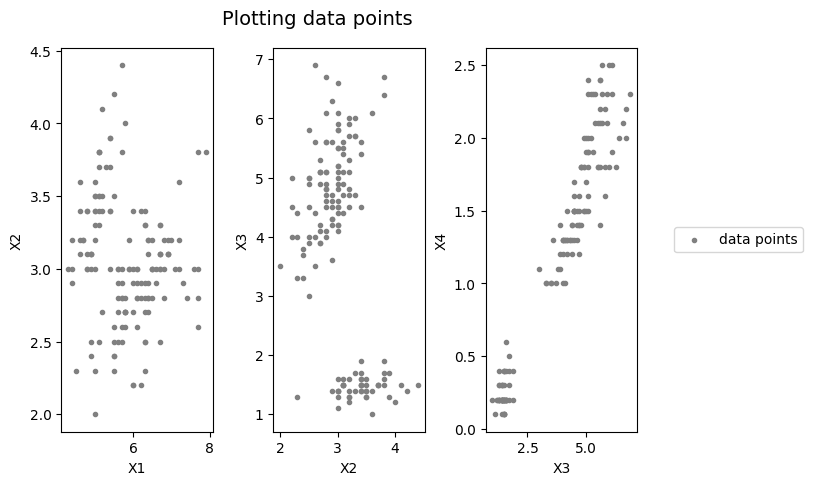

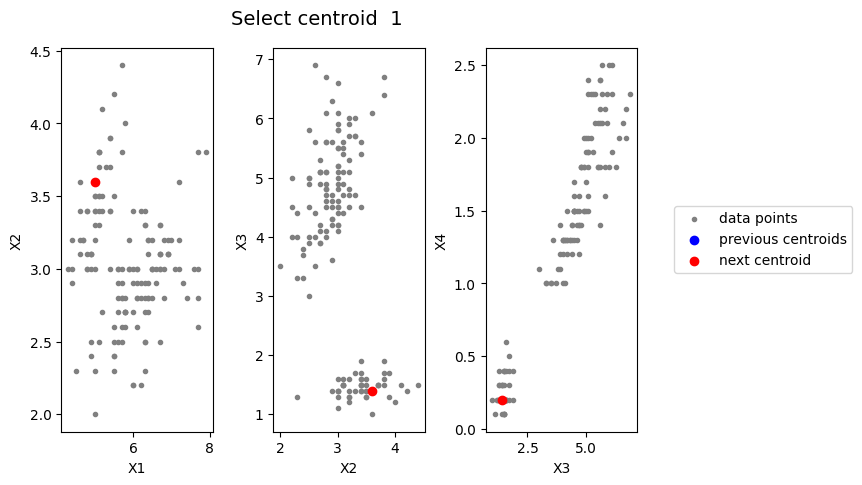

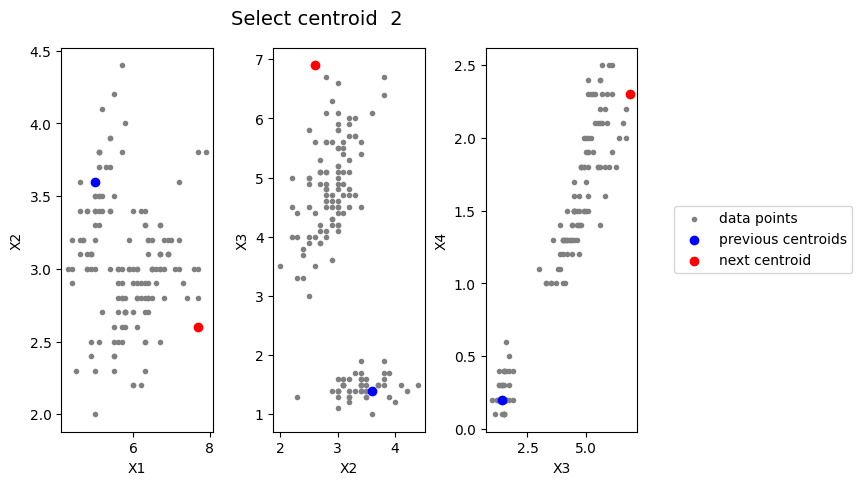

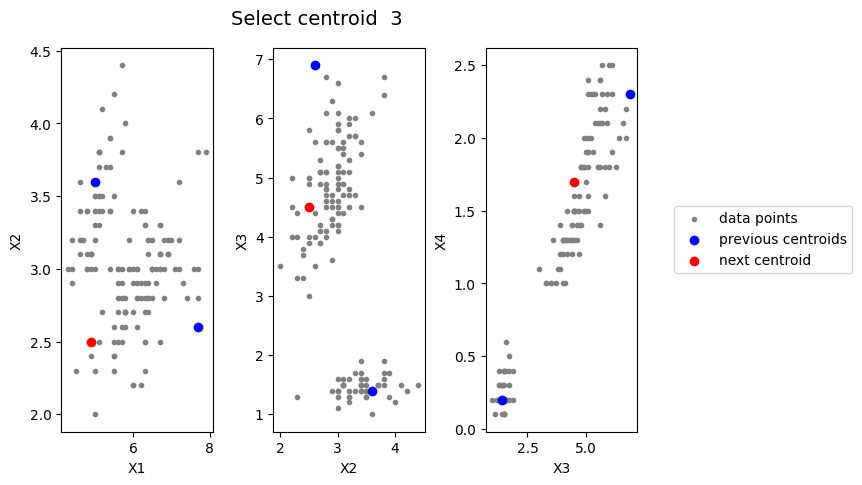

In [32]:
# call the initialize function to get the centroids
plot(data, np.array([]))
centroids = initialize(data, no_of_clusters = 3)

In [41]:
# assigning clusters for data points
def get_cluster(point, centroids):
    distances = [get_euclidean_distance(point, centroid) for centroid in centroids]
    return np.argmin(distances)

def get_color(i):
    if i==0:
        return 'red'
    elif i==1:
        return 'blue'
    else:
        return 'green'
cluster = [get_cluster(data[i], centroids) for i in range(data.shape[0])]
cluster_color = [get_color(i) for i in cluster]

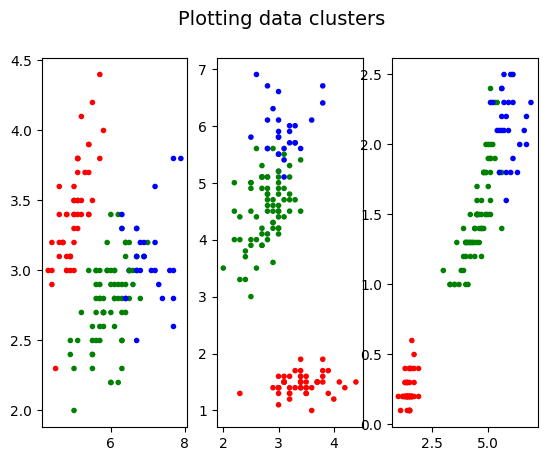

In [43]:
f, axes = plt.subplots(1, 3)
axes = axes.flatten()
f.suptitle('Plotting data clusters', fontsize=14)
axes[0].scatter(data[:, 0], data[:, 1], marker = '.',  color =cluster_color)
axes[1].scatter(data[:, 1], data[:, 2], marker = '.',  color =cluster_color)
axes[2].scatter(data[:, 2], data[:, 3], marker = '.',  color =cluster_color)

In [49]:
new_data_with_clusters = pd.DataFrame(data, columns=['X1', 'X2', 'X3', 'X4'])
new_data_with_clusters['cluster'] = cluster

# KNN classifier

In [100]:
def get_nearest_neighbor(point, new_data_with_clusters, k=3):

    # get the distance of the data point from the existsing data point
    distance = new_data_with_clusters.apply(lambda x: get_euclidean_distance(x[['X1', 'X2', 'X3', 'X4']].values, point[['X1', 'X2', 'X3', 'X4']].values), axis=1).to_list()
    
    # sort the distances and top k closest data points
    top_k_closest_neighbours = sorted(range(len(distance)), key=lambda i: -distance[i])[:k]

    # get the clusters which the top k data points are from 
    top_k_closest_neighbours_clusters = new_data_with_clusters.loc[top_k_closest_neighbours]['cluster'].to_list()

    # get the cluster which occurs the most in the clostest neighbours
    the_closest_cluster = max(top_k_closest_neighbours_clusters, key=top_k_closest_neighbours_clusters.count)

    # return the cluster
    return the_closest_cluster

In [101]:
# reading the dataset
data2 = pd.read_csv('cluster_data2.csv')

# lets assume k is 3
k = 3

In [106]:
data2

,X1,X2,X3,X4,cluster
0,5.21,3.65,1.42,0.25,1
1,5.07,3.41,1.43,0.19,1
2,5.85,2.65,4.14,1.27,0
3,5.64,2.73,4.03,1.23,1
4,6.55,2.90,5.54,2.05,0
5,5.83,2.75,4.27,1.34,0
6,4.86,3.31,1.45,0.22,1
7,6.63,2.96,5.50,1.93,0
8,5.01,3.39,1.55,0.27,1
9,6.45,3.03,5.33,2.17,0


In [102]:
clusters = []
for i, row in data2.iterrows():
    cluster = get_nearest_neighbor(row, new_data_with_clusters)
    clusters.append(cluster)

In [104]:
data2['cluster'] = clusters

In [105]:
data2

,X1,X2,X3,X4,cluster
0,5.21,3.65,1.42,0.25,1
1,5.07,3.41,1.43,0.19,1
2,5.85,2.65,4.14,1.27,0
3,5.64,2.73,4.03,1.23,1
4,6.55,2.90,5.54,2.05,0
5,5.83,2.75,4.27,1.34,0
6,4.86,3.31,1.45,0.22,1
7,6.63,2.96,5.50,1.93,0
8,5.01,3.39,1.55,0.27,1
9,6.45,3.03,5.33,2.17,0
